# *Lecture 3*

# Numerical Differentiation & Integration 

| |
|:---:|
|[From **COMPUTATIONAL PHYSICS**, 3rd Ed, 2015](http://physics.oregonstate.edu/~rubin/Books/CPbook/index.html) <br>RH Landau, MJ Paez, and CC Bordeianu (deceased) <br>Copyrights: <br> [Wiley-VCH, Berlin;](http://www.wiley-vch.de/publish/en/books/ISBN3-527-41315-4/) and [Wiley & Sons, New York](http://www.wiley.com/WileyCDA/WileyTitle/productCd-3527413154.html)<br>  R Landau, Oregon State Unv, <br>MJ Paez, Univ Antioquia,<br> C Bordeianu, Univ Bucharest, 2015.<br> Support by National Science Foundation.|

## Physics Introduction

Imagine that you have used a voltmeter to measure the electric potential at different points along an insulating rod.  The discrete set of measurements might look something like this:

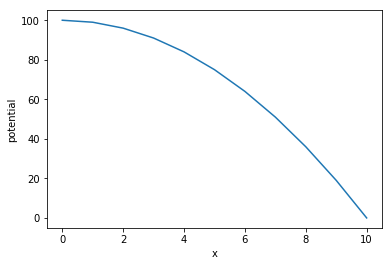

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]
V = [100.,  99.,  96.,  91.,  84.,  75.,  64.,  51.,  36.,  19.,   0.]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(x,V)
ax.set_xlabel("x")
ax.set_ylabel("potential")
plt.show()

How can we calculate the electric field along the rod from this electric potential, when we do not know the underlying analytic function (if any)?

## Numerical Differentiation

Many physics problems require first-order or higher-order derivatives of some function.
Those derivatives might give you velocity, force, power, etc.
Sometimes we do not have an analytic function to differentiate. 
We may have a table of discrete measurements representing position, or we may have a very complicated numerical function that is practically impossible to differentiate by hand. 

In principle, numerical differentiation should be a very easy calculation.
It is based on the definition of the elementary definition:

$$
\frac{dy(t)}{dt}  =  \lim_{h \rightarrow 0} \frac{y(t+h)-
y(t)}{h}.
$$

The problem is that this definition runs into numerical precision problems when $h$ is taken to be very small.
The numerator is not guaranteed to converge to 0 as $h\rightarrow 0$ (it is limited by machine precision roundoff errors), so the numerical limit can lead to an overflow.


### Forward Difference (Algorithm) [aka "two-point" algorithm]

All of the methods for numerical differentiation start by expanding a
function in a Taylor series about a point $t$ to obtain its value at a small step $h$ away:

$$\begin{align} y(t+h) &= y(t) + h \frac{dy(t)}{dt}+ \frac{h^{2}}{2!}
\frac{d^2y(t)}{dt^2}+ \frac{h^{3}}{3!} \frac{dy^3(t)}{dt^3} +
\cdots,   \tag*{5.2}\\
\Rightarrow \qquad \frac{y(t+h) - y(t)}{h}  &=    \frac{dy(t)}{dt}+ \frac{h}{2!}
\frac{d^2y(t)}{dt^2}+ \frac{h^{2}}{3!} \frac{dy^3(t)}{dt^3} +
\cdots, \tag*{5.3}
   \end{align}$$
   
If we ignore the $h^2$ terms (and higher) for the moment, we obtain the
*forward-difference* algorithm definition for the derivative $y^\prime(t)$. 

$$
\left.\frac{dy(t)}{dt}\right|_{\text{fd}} \equiv\frac{y(t+h) - y(t)}{h}$$

You might protest that this is exactly the same as the definition of the derivative, but the difference is that $h$ does not have to go to 0.
In fact, we control the size of the error on the derivative by controlling $h$.

The estimate of the error, controlled by $h$, follows from substituting the Taylor series:

$$\left.\frac{dy(t)}{dt}\right|_{\text{fd}} \simeq \frac{dy(t)}{dt} -
\frac{h}{2}\frac{d^2y(t)}{dt^2} + \cdots .$$

So we would say that this error is proportional to $h$.  (We assume implicitly that the derivatives are of the same order as the function $y$ itself.)

You can think of this approximation as using two points to represent the
function by a straight line in the interval from $t$ to $t + h$. 
The approximation has an error proportional to $h$
(unless the function is linear or otherwise special enough to make $y''$ vanish). We
can make the approximation error smaller by making *h* smaller, but if $h$ is too small 
the subtractive cancellation on the right-hand side will cause instability.

To see how the forward-difference algorithm works, let $y(t) = a + b t^2$. The exact derivative is 
$y' = 2 b t$, while the computed derivative is

$$
\left.\frac{dy(t)}{dt}\right|_{\text{fd}}\simeq \frac{y(t+h)-y(t)}{h}
= 2bt +bh.
$$

This clearly becomes a good approximation only for very small
$h$ (specfically $h\ll 1/b$).

### Central Difference [aka "three-point" algorithm"]

An improved approximation to the derivative cancels out the remaining terms of order $h$.  Instead of making a single step of $h$ forward, we form a *central difference*
by stepping forward half a step and backward half a step:

$$\begin{align}
 \left. \frac{dy(t)}{dt}\right|_{\text{cd}}  \equiv D_{\text{cd}} y(t)   &=
\frac{y(t+h/2)-y(t-h/2)}{h}.
\end{align}$$

You will sometimes see this definition as

$$\left.\frac{dy(t)}{dt}\right|_{\text{cd}}  \equiv D_{\text{cd}} y(t) =
\frac{y(t+h)-y(t-h)}{2h},$$

from which it gets its "three-point algorithm" name.

We estimate the error in the central-difference algorithm by substituting the
Taylor series for *y*(*t* + *h*/2) and*y*(*t* − *h*/2):

$$\begin{align}
y\left(t+\frac{h}{2}\right)-y\left(t-\frac{h}{2}\right) &
\simeq \left[y(t) + \frac{h}{2}y'(t) + \frac{h^2}{8}y''(t) +
\frac{h^3}{48}y'''(t)+ {\cal O}(h^4) \right]
  \\
&\quad - \left[y(t) - \frac{h}{2}y'(t) + \frac{h^2}{8}y"(t) -
\frac{h^3}{48}y'''(t)+ {\cal O}(h^4)\right]   \\
& = h y'(t) + \frac{h^3}{24}y'''(t) + {\cal O}(h^5), \\
\Rightarrow \quad \frac{dy(t)}{dt}\bigg|_{\text{cd}} & \simeq   y'(t)
+\frac{1}{24}h^{2}y'''(t) + {\cal O}(h^4) .\tag*{5.8}
   \end{align}$$

The important difference between this central-difference algorithm and the
forward difference one is that when $y(t − h/2)$ is subtracted from
$y(t + h/2)$, all terms containing an even power of *h* in the two Taylor
series cancel. This make the central-difference algorithm accurate to order
$h^2$ ($h^3$ before division by $h$), while the forward
difference is accurate only to order $h$. If the $y(t)$ is smooth, that is, if
$y'''h^{2}/24 \ll y''h/2$, then you can expect the central-difference error to be
smaller than with the central difference algorithm.  As usual, if $y'''$ vanishes, then the numerical derivative is exact.

For example, if we take the derivative of a parabola (quadratic) function $y(t)=bt^2$, we will see that the
central difference algorithm gives the exact derivative independent of $h$:

$$
\left. \frac{dy(t)}{dt}\right|_{\text{cd}} \simeq
\frac{y(t+{h/2})-y(t-{h/2})}{h} = 2bt.$$

This is to be expected because the higher derivatives equal zero for a
second order polynomial.


### Error Assessment for Numerical Differentiation

The approximation errors in numerical differentiation decrease with decreasing
step size $h$. In turn, round-off errors increase with decreasing step size
because you have to take more steps and do more calculations. The best approximation occurs for an $h$
that makes the total error $\epsilon_{\textrm app} + \epsilon_{\textrm ro}$ a
minimum, and that as a rough guide this occurs when $
\epsilon_{\textrm ro} \simeq
\epsilon_{\textrm app}$.

We have already estimated the approximation error in numerical differentiation
rules by making a Taylor series expansion of $y(x + h)$. The approximation
error with the forward-difference algorithm is ${\cal O}(h)$, while that
with the central-difference algorithm is ${\cal O}(h^2)$:

$$
\epsilon_{\textrm app}^{\textrm fd} \simeq \frac{y''h}{2}, \quad
\epsilon_{\textrm app}^{\textrm cd} \simeq
\frac{y'''h^{2}}{24}.$$

To obtain a rough estimate of the round-off error, we observe that
differentiation essentially subtracts the value of a function at argument $x$
from that of the same function at argument $x + h$ and then divides by
$h$: $y'\simeq [y(t + h)−y(t)]/h$. As $h$ is made continually smaller, we
eventually reach the round-off error limit where $y(t + h)$ and $y(t)$
differ by just machine precision $\epsilon_m$:

$$
\epsilon_{\textrm ro} \simeq \frac{\epsilon_m}{h}.$$

Consequently, round-off and approximation errors become equal when
$$\begin{align}
 &\epsilon_{\textrm ro}  \simeq \epsilon_{\textrm app},&\\
 \frac{\epsilon_{m}}{h}  &\simeq
\epsilon_{\textrm app}^{\textrm fd}   = \frac{y^{(2)}h}{2}
, & \frac{\epsilon_{m}}{h} &\simeq
\epsilon_{\textrm app}^{\textrm cd}
  =\frac{y^{(3)}h^{2}}{24},\\
 \Rightarrow \quad h_{\textrm fd}^{2} & =
\frac{2\epsilon_{m}}{y^{(2)}},  &  \Rightarrow \quad
h_{\textrm cd}^{3} \displaystyle &=
\frac{24\epsilon_{m}}{y^{(3)}}.
    \end{align}$$
 We take $y′\simeq y^{(2)} \simeq y^{(3)}$ (which may be crude
in general, although not bad for $e^t$ or $\cos t$) and assume
double precision, $\epsilon_m \simeq 10^{-15}$:
$$\begin{align}
h_{\textrm fd} &\simeq 4\times 10^{-8}, & h_{\textrm cd} &\simeq 3\times
10^{-5},\\
\Rightarrow \quad \epsilon_{\textrm fd} &  \simeq
\frac{\epsilon_m} {h_{\text{fd}}} \simeq 3\times 10^{-8}, & \quad
\Rightarrow \quad\epsilon_{\textrm cd}   & \simeq
\frac{\epsilon_m} { h_{\text{cd}}} \simeq 3\times 10^{-11}.
   \end{align}$$
 This may seem backward because the better algorithm leads to a larger
$h$ value. It is not. The reason is that the error for the central-difference method is of order $h^2$, but the error for the forward-difference method is of order $h$.

### Second Derivatives (example)

Let’s say that you have measured the position $y(t)$
*versus* time for a particle.  What is the force on the particle? 

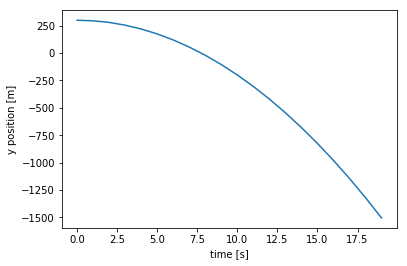

In [26]:
import matplotlib.pyplot as plt
# We're going to create some fake data here
# from the function y(t) = 300 - 5t^2
t_values = []
y_values = []
for t in range(20):
    t_values.append(t)
    y_values.append(300 - 5*t*t)
#    y_values.append(np.exp(t))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(t_values,y_values)
ax.set_xlabel("time [s]")
ax.set_ylabel("y position [m]")
plt.show()


By determining the derivative
$d^2 y/dt^2$ from the $y(t)$ values, we
determine the force.

The concerns we expressed about errors in first derivatives are even
more valid for second derivatives where additional subtractions may lead
to additional cancellations. Let’s look again at the central-difference
method:

$$\left. \frac{dy(t)}{dt}\right|_{cd} \simeq \frac{y(t+h/2) - y(t-h/2)}{h} .$$

This algorithm gives the derivative at $t$ by moving forward and
backward from $t$ by $h/2$. We take the second derivative $d^2 y/dt^2$
to be the central difference of the first derivative:

$$\begin{align}
\frac{d^2 y(t)}{dt^2} & \simeq    \frac{y'(t+{h/2}) - y'(t-{h/2})}{h}   \\
& \simeq \frac{[y(t+h) - y(t)] - [y(t)- y(t-h)]}{h^{2}} \tag*{Form A}\\ & =
\frac{y(t+h) + y(t-h) - 2y(t)}{h^{2}}.\tag*{Form B}\end{align}$$

As we did for first derivatives, we determine the second derivative at
$t$ by evaluating the function in the region surrounding *t*. Although
the Form B with three terms is more compact, it
may increase subtractive cancellation by first storing the “large”
number $y(t + h)+y(t − h)$ and then subtracting another large
number $2y(t)$ from it. Is there a big difference?

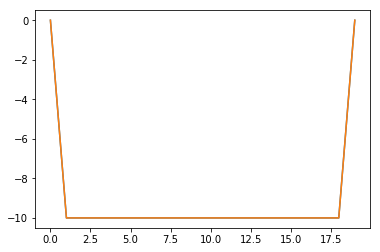

-10.0000000000000000000000, -10.0000000000000000000000


In [27]:
h = 1 # Otherwise we would have to interpolate
second_derivative_valuesA = []
second_derivative_valuesA.append(0)
second_derivative_valuesB = []
second_derivative_valuesB.append(0)

for t in range(1,19):
    dy2dt2A = ((y_values[t+1] - y_values[t]) - (y_values[t] - y_values[t-1]))/h/h
    dy2dt2B = (y_values[t+1] + y_values[t-1] - 2*y_values[t])/h/h
    second_derivative_valuesA.append(dy2dt2A)
    second_derivative_valuesB.append(dy2dt2B)
    
second_derivative_valuesA.append(0)
second_derivative_valuesB.append(0)
plt.plot(t_values,second_derivative_valuesA)
plt.plot(t_values,second_derivative_valuesB)
plt.show()
print("%.22f, %.22f" %(second_derivative_valuesA[10], second_derivative_valuesB[10]))

### Richardson Extrapolation ["five-point" and "N-point" algorithms]

We have seen how to use different step sizes in numerical differentiation.
We can combine different expressions in an attempt to eliminate the leading error terms.  This approach is called "Richardson extrapolation."

Our usual central difference formula with a full step $2h$ is

$$y'(t) = \frac{y(t+h)-y(t-h)}{2h} - \frac{h^2}{6}y'''(t) + \cdots$$

Now we use a different step size $4h$:

$$y'(t) = \frac{y(t+2h)-y(t-2h)}{4h} - \frac{4h^2}{6}y'''(t) + \cdots$$

The step size is twice as large, but the error is four times as large.  (This is why we want a small step size, in general.)

To eliminate the leading error term (order $h^2$), we would divide the second expression by 4 and subtract it from the first expression.

$$\frac{3}{4}y'(t) = \frac{y(t-2h)-8y(t-h)+8y(t+h)-y(t+2h)}{4h} + \mathcal{O}(h^4) + \cdots$$

or 

$$y'(t) = \frac{y(t-2h)-8y(t-h)+8y(t+h)-y(t+2h)}{12h} + \mathcal{O}(h^4) + \cdots$$

This is the way to derive additional "5-point" and "N-point" formulas.
The Richardson extrapolation can also be carried out numerically, by calculating the central-difference result with two different step sizes, then subtracting the results appropriately.

This is a very nice trick for improving the precision of functions by carefully canceling the remaining errors at any order.  It does lead to some strange coefficients, though.

### Conclusion

There is not much more to say about differentiation.  In general it is much more straightforward than integration.  The thing to watch is the point spacing, if you have any control over the step size.

# Intermission

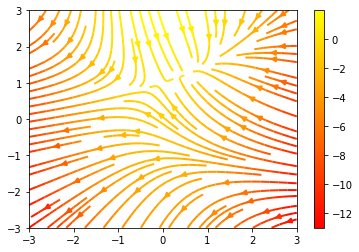

In [6]:
"""
Demo of the `streamplot` function, used to display 2D vector fields.
"""
import numpy as np
import matplotlib.pyplot as plt

Y, X = np.mgrid[-3:3:100j, -3:3:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U*U + V*V)

fig0, ax0 = plt.subplots()
strm = ax0.streamplot(X, Y, U, V, color=U, linewidth=2, cmap=plt.cm.autumn)
fig0.colorbar(strm.lines)

plt.show()

## Introduction to Numerical Integration 

Numerical integration is less straightforward than differentiation.  The reason is that contributions from each point in the domain have an effect on the final integral.  This is not true of differentiation, for which the impact of a single point is local.

Numerical integration is sometimes called *numerical quadrature*.
Some explanations say this is related to the "squaring of the circle," drawing a square with the same area as a given circle.
Other explanations say the name comes from summing quadrilaterals which are used to approximate the function.
Either way, it is a very rich topic, with many complex techniques to ensure good accuracy.

The basic strategy for all of the numerical integration formulas is to approximate the function in a local interval with a function that can be integrated exactly.  The simplest example is of course a constant (zeroth-order polynomial) function, next simplest is a first-degree polynomial, and so on.

### Quadrature as Box Counting

The formal Riemann definition of an integral is the limit of the sum over rectangular boxes
as the width $h$ of the boxes approaches zero:

$$
  \int_{a}^{b} f(x)  dx = \lim_{h\rightarrow 0} \left[h
    \sum_{i=1}^{(b-a)/h} f(x_{i}) \right].$$

The numerical integral of a function $f(x)$ is approximated as the
equivalent of a finite sum over $N$ boxes of height $f(x_i)$ and width
$w_i$:

$$\int_{a}^{b} f(x)  dx \simeq \sum_{i=1}^{N} f(x_{i}) w_{i},$$

which is similar to the Riemann definition except there is requirement that the box width approach 0.

This is the standard form for all integration
algorithms; 
* the function $f(x)$ is evaluated at $N$ points in the interval $[a, b]$
* the function values $f_i \equiv f(x_i)$ are summed with weights $w_i$

In the case of the "box sum," we will see that the weights are indeed the width, but this need not be true in general.

**The flexibility in the numerical integration algorithms is all in the weights!**

Because the “best” integration
rule depends on the specific behavior of $f(x)$, there is no universally best
integration scheme. Many of the "professional-level" integration routines adapt by choosing the best algorithm for a given function in a specific range.

### Algorithm: Trapezoid Rule

The trapezoid and Simpson integration rules both use evenly spaced
values of $x$. They use $N$ points
$x_i$ $(i = 1, N)$ evenly spaced at a distance $h$ 
throughout the integration region $[a, b]$ and *include the
endpoints* in the integration region. This means that there are
$(N − 1)$ intervals of length $h$:

$$h= \frac{b-a}{N-1},\qquad x_{i} = a + (i-1) h, \qquad i=1, N,$$

where we start our counting at $i = 1$. 

The **trapezoid rule** uses the simplest possible approximation to the function.  
It takes each
integration interval $i$ and constructs a trapezoid of width $h$ in it. This approximates $f(x)$ by a straight line (first-order polynomial) in each
interval $i$ and uses the average height
($f_i + *f_{i + 1})/2$ as the local value for $f$. The
area of each such trapezoid is

$$\int_{x_{i}}^{x_{i}+h}f(x) dx \simeq \frac{h(f_{i}+f_{i+1})}{2} =
\frac{1}{2}hf_{i} + \frac{1}{2}hf_{i+1}.$$

<img src="Figures/Trapezoid_Rule.png" width="50%">

In terms of our standard integration formula, the trapezoid rule has $N=2$ and *local weights* $w_i = \frac{h}{2}$.

In order
to apply the trapezoid rule to the entire region $[a,b]$, we add the
contributions from each subinterval:

$$
\int_{a}^{b}f(x)  dx \simeq \frac{h}{2}f_{1} + hf_{2}
  +hf_{3} + \cdots + hf_{N-1} + \frac{h}{2}f_{N} .$$

You will notice that because the internal points are counted twice (as
the end of one interval and as the beginning of the next), they have *total
weights* of $h/2 + h/2 = h$, whereas the endpoints are counted just
once, and on that account have *total weights* of only $h/2$. In terms of our
standard integration rule:

The following code implements the trapezoid rule to
integrate an arbitrary function $f(y)$. Note
how the step size $h$ depends on the interval and how the weights at the
ends and middle differ.

### TrapMethods.py, Notebook Version 

In [8]:
# TrapMethods.py      Trapezoid integration using a defined function f(y) = y^2

import numpy as np

# Constant definitions: note reminders of float vs. int
A = 0.0
B = 3.0
N = 1200

def f(y):                                   # Integrand definition function
    return y*y

def wTrap(i, h):                            # Total weight definition function
    if ( (i == 1) or (i == N) ):
        wTotal = h/2.0
    else:
        wTotal = h
    return wTotal

h = (B - A)/(N - 1)
suma = 0.0

for i in range(1, N + 1):
    t = A + (i - 1)*h
    suma  = suma + wTrap(i, h) * f(t)
    
print('Final sum = ', suma)

Final sum =  9.000003130214854


### Algorithm: Simpson’s Rule

A better approach is to approximate the function with a second-order polynomial over the local interval.
**Simpson’s rule** approximates the integrand $f(x)$ by a parabola for each
interval: 

$$\begin{align}
f(x) \simeq \alpha x^{2} + \beta x + \gamma ,
   \end{align}$$
   
We can calculate the weights by looking at the Taylor series expansion (with $f'$ and $f''$) in the local interval, or by calculating the area under the parabola directly.
  
We assume that all intervals are equally spaced. The area under the parabola for
each interval is

$$
\int_{x_i}^{x_i+h}(\alpha x^{2} + \beta x +\gamma)  dx = \left.
\frac{\alpha x^3 } { 3} +   \frac{\beta x^2} { 2}
    + \gamma x \right|_{x_i}^{x_i+h}.$$

In order to relate the parameters $\alpha$, $\beta$, and $\gamma$ to the function, we
consider an interval from −1 to +1, in which case

$$
\int_{-1}^{1}(\alpha x^{2} + \beta x +\gamma)  dx =
\frac{2\alpha}{3} + 2\gamma.$$

But we notice that

$$
\begin{align}
 f(-1) & = \alpha -\beta+\gamma, \quad  f(0) = \gamma, \quad f(1) = \alpha + \beta +
  \gamma,\\
  \Rightarrow & \alpha = \displaystyle \frac{f(1)+f(-1)} { 2} -f(0), \quad
   \beta =       \frac{f(1)-f(-1)} { 2},  \quad \gamma= f(0).
   \end{align}$$

In this way we can express the integral as the weighted sum over the
values of the function at three points:

$$
\int_{-1}^{1}(\alpha x^{2} + \beta x +\gamma)  dx =
\frac{f(-1)}{3} + \frac{4f(0)}{3} + \frac{f(1)}{3} .$$

The *local weights* are therefore $(h/3, 4h/3, h/3)$.

Because three values of the function are needed, we generalize this
result to our problem by evaluating the integral over two adjacent
intervals, in which case we evaluate the function at the two endpoints
and in the middle:

$$\begin{align}
\int_{x_{i}-h}^{x_{i}+h}f(x)  dx & =  \int_{x_{i}}^{x_{i}+h}f(x)
dx + \int_{x_{i}-h}^{x_{i}}f(x) dx\\
  & \simeq   \frac{h}{3}f_{i-1}
    + \frac{4h}{3}f_{i} + \frac{h}{3}f_{i+1} .\tag*{5.40}
   \end{align}$$

Simpson’s rule requires the elementary integration to be over *pairs* of
intervals, which in turn requires that the *total number of intervals be
even or that the number of points $N$ be odd*. In order to apply
Simpson’s rule to the entire interval, we add up the contributions from
each pair of subintervals, counting all but the first and last endpoints
twice:

$$\int_{a}^{b}\!\!f(x)dx \simeq \frac{h}{3}f_{1} +
\frac{4h}{3}f_{2}+ \frac{2h}{3}f_{3} + \frac{4h}{3}f_{4} + \cdots
+\frac{4h}{3}f_{N-1} + \frac{h}{3}f_{N}.
\tag*{5.41}$$

The *total weights* for Simpson's rule are:

$$\tag*{5.42}
  w_{i} = \left\{\frac{h}{3},  \frac{4h}{3},
\frac{2h}{3},  \frac{4h}{3},   \ldots,
    \frac{4h}{3},   \frac{h}{3} \right\} \qquad   \mbox{(Simpson's rule)}.$$

The sum of these weights provides a useful check on your integration:

$$
\sum_{i=1}^{N} w_{i} = (N-1) h.$$

*Remember*, the number of points *N* must be odd for Simpson’s rule.

## Integration Error Estimates

In general, you should choose an integration rule that gives an accurate answer
using the least number of integration points. We obtain a crude estimate of the
*approximation* or *algorithmic error* $\cal{E}$ for the equal-spacing rules
and their relative error $\epsilon$ by expanding $f(x)$ in a Taylor series around the
midpoint of the integration interval.
We then multiply that error by the number
of intervals $N$ to estimate the error for the entire region $[a, b]$. For the
trapezoid and Simpson rules this yields

$${\cal E}_t = O\left(\frac{[b-a]^{3}}{N^{2}}
\right)f^{(2)},\quad {\cal E}_{s} = O\left(\frac{[b-a]^{5}}{N^{4}} \right)
f^{(4)},\quad \epsilon_{t,s} = \frac{{\cal E}_{t,s}}{f},$$

where $\epsilon$ is a measure of the relative error. 
Consequently, for small intervals and functions $f(x)$ with
well-behaved derivatives, Simpson’s rule should converge more rapidly
than the trapezoid rule.  This is not surprising, since Simpson's rule captures the second derivative term of the approximation.

To model the round-off error in integration, we assume that after $N$
steps the *relative* round-off error is random and of the form

$$
\epsilon_{\textrm ro} \simeq \sqrt{N} \epsilon_{m},$$

where $\epsilon_m$ is the machine precision (remember that $\epsilon \sim 10^{−7}$
for single precision and $\epsilon \sim 10^{−15}$ for double precision). 
We want to
determine an $N$ that minimizes the total error, that is, the sum of the
approximation and round-off errors:

$$
\epsilon_{\textrm tot} \simeq  \epsilon_{\textrm ro} + \epsilon_{\textrm app}.$$

This occurs, approximately, when the two errors are of equal magnitude,
which we approximate even further by assuming that the two errors are
exactly equal:

$$
\epsilon_{\textrm ro} = \epsilon_{\textrm app} =\frac{{\cal
E}_{\textrm trap,simp}}{f} .$$

To continue the search for optimum $N$ for a general function $f$, we
set the scale of function size and the lengths by assuming

$$
\frac{f^{(n)}}{f} \simeq 1 , \quad b - a = 1 \quad \Rightarrow \quad  h =
\frac{1}{N}.$$

This estimate, when applied to the **trapezoid rule**, yields

$$\begin{align}
\sqrt{N} \epsilon_{m} & \simeq   \frac{f^{(2)} (b-a)^{3}}{f N^{2}} =
\frac{1}{N^{2}},\\
\Rightarrow \quad N & \simeq   \frac{1}{(\epsilon _{m})^{2/5}} =
\left(\frac{1}{10^{-15}}\right)^{2/5} = 10^{6},\\ 
\Rightarrow \epsilon_{\textrm ro} & \simeq \sqrt{N} \epsilon_{m}
=10^{-12}.
   \end{align}$$

And the estimate, when applied to **Simpson’s rule**, yields

$$\begin{align}
\sqrt{N} \epsilon_{m} & =  \frac{f^{(4)}(b-a)^{5}}{fN^{4}} =
\frac{1}{N^{4}}, \\ 
\Rightarrow N & =  \frac{1}{(\epsilon _{m})^{2/9}}
=\left(\frac{1}{10^{-15}}\right)^{2/9} = 2154,\\
\Rightarrow \epsilon_{\textrm ro} & \simeq    \sqrt{N} \epsilon_{m} = 5
\times 10^{-14}.
   \end{align}$$

These results show

-   Simpson’s rule requires fewer points and has smaller errors than the
    trapezoid rule.

-   It is possible to obtain an error close to machine precision with
    Simpson’s rule (and with other higher-order integration algorithms).

-   Obtaining the *best* numerical approximation to an integral is not
    achieved by letting $N \rightarrow \infty$ but with a relatively small $N \leq 1000$.
    Larger $N$ only makes the round-off error dominate.

In [1]:
# Tests of numerical integration
from numpy import *

# Constant definitions: note reminders of float vs. int
A = 0.0
B = pi/2.
N = 101         # must be odd for Simpson's rule

def f(y):                                   # Integrand definition function
    return sin(y)

def wTrap(i, h):                            # Total weight definition function
    if ( (i == 1) or (i == N) ):
        wTotal = h/2.0
    else:
        wTotal = h
    return wTotal

def wSimpson(i, h):                            
    if ( (i == 1) or (i == N) ):
        wTotal = h/3.0
    elif (i%2 == 0):
        # Even i
        wTotal = 4.*h/3.0
    else:
        # Odd i
        wTotal = 2.*h/3.0
    #print(i, wTotal)
    return wTotal

h = (B - A)/(N - 1)
suma_trap = 0.0
suma_simp = 0.0

for i in range(1, N + 1):
    t = A + (i - 1)*h
    suma_trap  = suma_trap + wTrap(i, h) * f(t)
    suma_simp  = suma_simp + wSimpson(i, h) * f(t)
    
print("Final sum (trapezoid rule) = ", suma_trap)
print("Final sum (Simpsons's rule)= ", suma_simp)

Final sum (trapezoid rule) =  0.9999794382396079
Final sum (Simpsons's rule)=  1.0000000003382359


## Python implementations

For reference, I give here the Python implementations of the methods we have derived and tested.

* [`scipy.misc.derivative`](https://docs.scipy.org/doc/scipy-1.0.0/reference/generated/scipy.misc.derivative.html#scipy.misc.derivative) implements the central-difference formula for derivatives of any order.
* [`numpy.gradient`](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.gradient.html#numpy.gradient) can be used in special cases to find the derivative.  I don't recommend using this for 1-D functions.
* [`numpy.trapz`](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.trapz.html#numpy.trapz) implements the trapezoidal rule for numerical integration
* [`scipy.integrate.simps`](https://docs.scipy.org/doc/scipy-1.0.0/reference/generated/scipy.integrate.simps.html) implements Simpson's rule for numerical integration

In [2]:
import numpy
import scipy.misc

def f(x):
    return 300. - 5*x*x

x = numpy.linspace(0,10,101)
y = f(x)
print(x)
print(y)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]
[ 300.    299.95  299.8   299.55  299.2   298.75  298.2   297.55  296.8
  295.95  295.    293.95  292.8   291.55  290.2   288.75  287.2   285.55
  283.8   281.95  280.    277.95  275.8   273.55  271.2   268.75  266.2
  263.55  260.8   257.95  255.    251.95  248.8   245.55  242.2   238.75
  235.2   231.55  227.8   223.95  220.    215.95  211.8   207.55  203.2
  198.75  194.2   189.55  184.8   179.95  175.    169.95  164.8   159.55
  154.2   148.75  143.2   137.55  131.8   125.95  1

In [23]:
print(scipy.misc.derivative(f, 10.0, dx=1e-6, n=1))
print(scipy.misc.derivative(f, 10.0, dx=1e-6, n=2))
print(scipy.misc.derivative(f, 10.0, dx=1e-4, n=2))

-99.99999991805453
-10.00444171950221
-10.000002248489182


In [24]:
print(numpy.trapz(y,x))

1333.25


In [25]:
print(scipy.integrate.simps(y,x))

1333.3333333333335
